# CS 309 FINAL PROJECT JUPYTER NOTEBOOK
**Avinash Gupta, Jessica Chen, Shiyu Xu**

# Imports

In [ ]:
from scipy.optimize import curve_fit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
%matplotlib inline

# Data Generation: Production, Avg Pump, Avg Proppant

Let's define three decline curve functions that we can pass into ``curve_fit``:
``exponential``, ``hyperbolic``, and ``harmonic``

**Exponential Decline**
$$q(\Delta t)=q_i e^{-a\Delta t}$$
where $q_i$ is the initial rate, and $a$ is the decline rate. The exponential decline curve has one fitting parameter: $a$

**Hyperbolic Decline**
$$q(\Delta t)=\frac{q_i}{(1+ba_i\Delta t)^{(\frac{1}{b})}}$$
where $q_i$ is the initial rate, and $a_i$ is the decline rate, $b$ fractional exponent. The hyperbolic decline curve has two fitting parameters: $a_i$ and $b$

**Harmonic Decline**
$$q(\Delta t)=\frac{q_i}{(1+a_i\Delta t)}$$
where $q_i$ is the initial rate, and $a_i$ is the decline rate. The harmonic decline curve has one fitting parameter: $a_i$

In [ ]:
def decline_curve(curve_type, q_i):
    if curve_type == "exponential":
        def exponential_decline(T, a):
            return q_i*((np.exp(-a*T)))
        return exponential_decline
    
    elif curve_type == "hyperbolic":
        def hyperbolic_decline(T, a_i, b):
            return q_i/np.power((1+b*a_i*T), 1./b)
        return hyperbolic_decline
    
    elif curve_type == "harmonic":
        def parabolic_decline(T, a_i):
            return q_i/(1+a_i*T)
        return parabolic_decline
    
    else:
        raise "I don't know this decline curve!"

def L2_norm(pred, actual):
    return np.sum(np.power(np.subtract(pred, actual), 2))

In [ ]:
df = pd.read_csv(r'well production.csv')
Q = df.loc[4][3:15] # oil prod
# Convert elements to floats
T = [float(x) for x in range(0, 12, 1)] # months: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]
Q = [float(x) for x in Q]

Let's define our decline curves using our initial rate. We then pass these on to scipy.optimize.curve_fit and compute the L2 norm of the resulting fits (using the following equation): $$Error_{L2}=\sum{|{q(t)-q_{obs}(t)}|^2}$$

In [ ]:
# Decline curve function (using initial rate)
exp_decline = decline_curve("exponential", Q[0])
hyp_decline = decline_curve("hyperbolic", Q[0])
har_decline = decline_curve("harmonic", Q[0])

# Store the optimized parameters for the fitted curves (T = time = x, Q = oil prod = y)
popt_exp, _ = curve_fit(exp_decline, T, Q, method="trf")
popt_hyp, _ = curve_fit(hyp_decline, T, Q, method="trf")
popt_har, _ = curve_fit(har_decline, T, Q, method="trf")

print("L2 Norm of exponential decline       : " + str(L2_norm(exp_decline(np.array(T), popt_exp[0]), Q)))
print("L2 Norm of hyperbolic decline: " + str(L2_norm(hyp_decline(np.array(T), popt_hyp[0], popt_hyp[1]), Q)))
print("L2 Norm of harmonic decline decline  : " + str(L2_norm(har_decline(np.array(T), popt_har[0]), Q)))

L2_norms = [L2_norm(exp_decline(np.array(T), popt_exp[0]), Q), L2_norm(hyp_decline(np.array(T), popt_hyp[0], popt_hyp[1]), Q), L2_norm(har_decline(np.array(T), popt_har[0]), Q)]
best_fit = L2_norms.index(min(L2_norms))

L2 Norm of exponential decline       : 349578.4953459189
L2 Norm of hyperbolic decline: 2210.868949459795
L2 Norm of harmonic decline decline  : 980022.8883363877


As we can see the hyperbolic decline fits the data much better than the other decline curves. Let's now visualise the results using matplotlib.

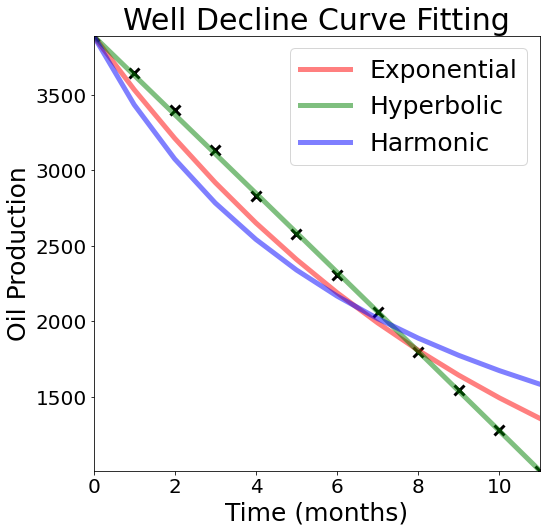

In [ ]:
fig, ax = plt.subplots(1, figsize=(8, 8))

ax.set_title("Well Decline Curve Fitting", fontsize=30)

# Set size of tick labels
label_size = 20
yed = [tick.label.set_fontsize(label_size) for tick in ax.yaxis.get_major_ticks()]
xed = [tick.label.set_fontsize(label_size) for tick in ax.xaxis.get_major_ticks()]

ax.set_xlim(min(T), max(T))

# Plot actual datapoints
ax.scatter(T, Q, color="black", marker="x", s=100, linewidth=3)

# Axis labels
ax.set_xlabel("Time (months)", fontsize=25)
ax.set_ylabel("Oil Production", fontsize=25)

# Define the three prediction curves
pred_exp = exp_decline(np.array(T), popt_exp[0]).tolist()
pred_hyp = hyp_decline(np.array(T), popt_hyp[0], popt_hyp[1]).tolist()
pred_har = har_decline(np.array(T), popt_har[0]).tolist()

# Calculate min and max value for y-axis limits
min_val = min([min(curve) for curve in [pred_exp, pred_hyp, pred_har]])
max_val = max([max(curve) for curve in [pred_exp, pred_hyp, pred_har]])
ax.set_ylim(min_val, max_val)

# Plot the data
ax.plot(T, pred_exp, color="red", linewidth=5, alpha=0.5, label="Exponential")
ax.plot(T, pred_hyp, color="green", linewidth=5, alpha=0.5, label="Hyperbolic")
ax.plot(T, pred_har, color="blue", linewidth=5, alpha=0.5, label="Harmonic")

ax.legend(fontsize=25)

Let's also visualize production predictions for the three curves over the next 36 months

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in power
  if __name__ == '__main__':


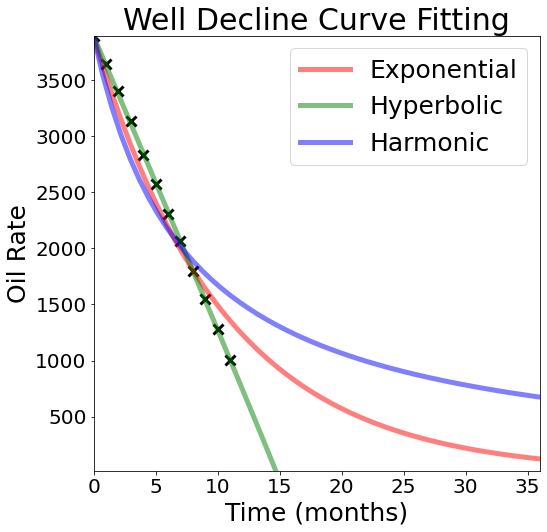

In [ ]:
fig, ax = plt.subplots(1, figsize=(8, 8))

# Number of months for prediction
T_max = 36.0
T_pred = np.linspace(min(T), T_max)

ax.set_title("Well Decline Curve Fitting", fontsize=30)

# Set size of tick labels
label_size = 20
yed = [tick.label.set_fontsize(label_size) for tick in ax.yaxis.get_major_ticks()]
xed = [tick.label.set_fontsize(label_size) for tick in ax.xaxis.get_major_ticks()]

ax.set_xlim(min(T), max(T_pred))

# Plot actual datapoints
ax.scatter(T, Q, color="black", marker="x", s=100, linewidth=3)
ax.set_xlabel("Time (months)", fontsize=25)
ax.set_ylabel("Oil Rate", fontsize=25)

# Define the three prediction curves
pred_exp = exp_decline(T_pred, popt_exp[0])
pred_hyp = hyp_decline(T_pred, popt_hyp[0], popt_hyp[1])
pred_har = har_decline(T_pred, popt_har[0])

# Calculate min and max value for y-axis limits
min_val = min([min(curve) for curve in [pred_exp, pred_hyp, pred_har]])
max_val = max([max(curve) for curve in [pred_exp, pred_hyp, pred_har]])
ax.set_ylim(min_val, max_val)

# Plot the data
ax.plot(T_pred, pred_exp, color="red", linewidth=5, alpha=0.5, label="Exponential")
ax.plot(T_pred, pred_hyp, color="green", linewidth=5, alpha=0.5, label="Hyperbolic")
ax.plot(T_pred, pred_har, color="blue", linewidth=5, alpha=0.5, label="Harmonic")
ax.legend(fontsize=25)

In [ ]:
# Store the prediction curves
pred_curves = [pred_exp, pred_hyp, pred_har]

# Oil threshold - monthly production at which drilling is no longer viable
oil_threshold = 35

# Estimate cumulative oil production (until oil threshold is reached)
last_month = next(month for month, pred_oil in enumerate(pred_curves[best_fit]) if pred_oil < oil_threshold or math.isnan(pred_oil)) - 1 # This is the last month oil drilling is profitable

# Print cumulative production estimate for the optimally fitted curve
curve_fit_names = ['exponential', 'hyperbolic', 'harmonic']
print('Cumulative production estimate ' + 'using a(n) ' + curve_fit_names[best_fit] + ' decline curve over ' + str(last_month) + ' months: ' + str(np.sum(pred_curves[best_fit][0:last_month+1]))) # Left Riemann sum to estimate integral of optimally fitted production curve

Cumulative production estimate using a(n) hyperbolic decline curve over 19 months: 41288.07601336715


Finally, let's predict the cumulative production for each well, and store this

In [ ]:
df = pd.read_csv(r'well production.csv')
map = {}

well_names = []
well_productions = []

for i in range(0, len(df)):
    Q = df.loc[i][3:15] # oil prod
    # Convert elements to floats
    T = [float(x) for x in range(0, 12, 1)] # months: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]
    Q = [float(x) for x in Q]
    # Decline curve function (using initial rate)
    exp_decline = decline_curve("exponential", Q[0])
    hyp_decline = decline_curve("hyperbolic", Q[0])
    har_decline = decline_curve("harmonic", Q[0])

    # Store the optimized parameters for the fitted curves (T = time = x, Q = oil prod = y)
    popt_exp, _ = curve_fit(exp_decline, T, Q, method="trf")
    popt_hyp, _ = curve_fit(hyp_decline, T, Q, method="trf")
    popt_har, _ = curve_fit(har_decline, T, Q, method="trf")

    # Calculate L2 norms and decide best fitting curve
    L2_norms = [L2_norm(exp_decline(np.array(T), popt_exp[0]), Q), L2_norm(hyp_decline(np.array(T), popt_hyp[0], popt_hyp[1]), Q), L2_norm(har_decline(np.array(T), popt_har[0]), Q)]
    best_fit = L2_norms.index(min(L2_norms))

    # Define the three prediction curves
    T_max = 36.0
    T_pred = np.linspace(min(T), T_max)
    pred_exp = exp_decline(T_pred, popt_exp[0])
    pred_hyp = hyp_decline(T_pred, popt_hyp[0], popt_hyp[1])
    pred_har = har_decline(T_pred, popt_har[0])

    # Store the prediction curves
    pred_curves = [pred_exp, pred_hyp, pred_har]

    # Oil threshold - monthly production at which drilling is no longer viable
    oil_threshold = 35

    # Estimate cumulative oil production (until oil threshold is reached)
    last_month = next(month for month, pred_oil in enumerate(pred_curves[best_fit]) if pred_oil < oil_threshold or math.isnan(pred_oil)) - 1 # This is the last month oil drilling is profitable
    # Add the estimates, along with the name of the well, to lists (later used in dataframe creation)
    well_names.append(df.loc[i][1])
    well_productions.append(np.sum(pred_curves[best_fit][0:last_month+1]))
    map[df.loc[i][1]] = np.sum(pred_curves[best_fit][0:last_month+1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in power
  if __name__ == '__main__':


Now that we have the avg proppant, pump rate, and cumulative production for each well, let's compile of all this into a dataframe and write it to a csv file. We can use this data when optimizing well parameters, which we do in the next section.

In [ ]:
avg_proppant = []
avg_pump = []
frac_count = []
well_files = []
for well_file in os.listdir('well production'):
    count = 0
    prop = 0
    pump = 0
    well_file_df = pd.read_csv(os.path.join('well production', well_file))
    for i in range(0, len(well_file_df)):
        if (well_file_df.loc[i]['proppant weight (lbs)'] > 0 and well_file_df.loc[i]['pump rate (cubic feet/min)'] > 0):
            count += 1
            prop += well_file_df.loc[i]['proppant weight (lbs)']
            pump += well_file_df.loc[i]['pump rate (cubic feet/min)']
    well_files.append(well_file[:-4])
    avg_proppant.append(prop/count)
    avg_pump.append(pump/count)
    frac_count.append(count)

In [ ]:
# Generate a csv file with the production data for each well
well_productions = []
for well in well_files:
    well_productions.append(map.get(well))
well_data = {'well name': well_files, 'avg proppant weight': avg_proppant, 'avg pump rate': avg_pump, 'num frac stages': frac_count, 'pred production': well_productions}

well_df = pd.DataFrame(data=well_data)
well_df.to_csv(r'well_data.csv', index = False)

# Determining Optimal Well Parameters
***Well Length***: Because well length and area of the reservoir have a direct positive correlation, the maximum the well length returns the maximum area. So we choose 5 miles, 26400 feet, the maximum well length can get to be the well length.

***# Frac Stages***: From the graph, we can notice that 50 frac stages is optimal. So we will choose 50 frac stages as the frac stage number.

***Amount of Proppant Per Stage***: From the graph, we can notice proppant weight does not have correlation with production. So we will use the proppant of our model well (which, later in the notebook, is found to be 671381)

***Pump Rate***: From the graph, we can notice that pump rate in the range of 300 to 310 are producing the same production. So we choose the lowest, 300 as the pump rate to minimize the cost.

In [27]:
locationFile = pd.read_csv("well_data.csv")

Text(0, 0.5, 'pred production')

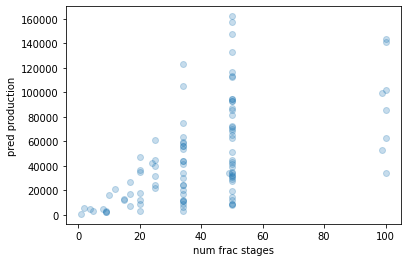

In [28]:
X = locationFile['num frac stages'].values
y = locationFile['pred production'].values
plt.scatter(X,y, alpha=0.25)
plt.xlabel('num frac stages')
plt.ylabel('pred production')

Text(0, 0.5, 'pred production')

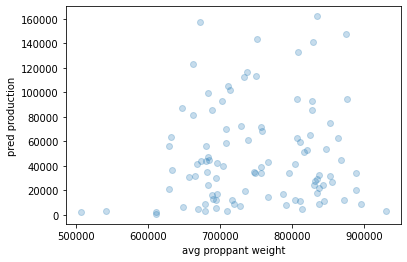

In [29]:
X = locationFile['avg proppant weight'].values
y = locationFile['pred production'].values
plt.scatter(X,y, alpha=0.25)
plt.xlabel('avg proppant weight')
plt.ylabel('pred production')

Text(0, 0.5, 'pred production')

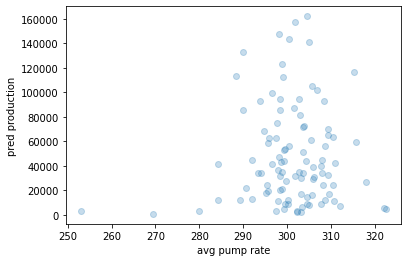

In [30]:
X = locationFile['avg pump rate'].values
y = locationFile['pred production'].values
plt.scatter(X,y, alpha=0.25)
plt.xlabel('avg pump rate')
plt.ylabel('pred production')

# Determing Well Locations

Let's store the easting and northing values for each well

In [ ]:
well_info = []

for well_file in os.listdir('well production'):
    eastings = []
    well_file_df = pd.read_csv(os.path.join('well production', well_file))
    for i in range(0, len(well_file_df)):
        eastings.append(well_file_df.loc[i]['easting'])
    northing = well_file_df.loc[0]['northing']
    production = map.get(well_file[:-4])
    well_info.append([eastings, northing, production])

We can now generate a color map for production, which we will use to pick our 10 best wells

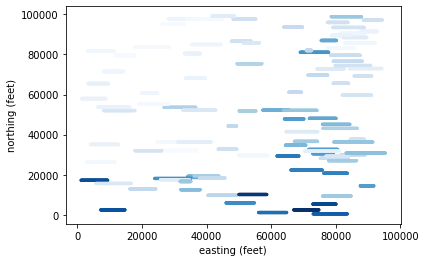

In [ ]:
x = []
y = []
prod = []
for eastings, northing, production in well_info:
    x.extend(eastings)
    for i in range(100):
        y.append(northing)
    prod.extend([production]*100)
# Add line of eastings and northings to graph, colored based on production
plt.scatter(x, y, c=prod, cmap='Blues', s=5)
plt.xlabel('easting (feet)')
plt.ylabel('northing (feet)')
plt.show()

Below are our 10 wells (stored as lists of easting and northing values). The lists alone are hard to interpret, so let's add these wells to our original graph in red. First, we will define a ``Well`` class

In [ ]:
class Well:
    def __init__(self, easting, northing):
        self.easting_start = easting
        self.northing = northing
    def getX(self):
        out = []
        for i in range(100):
            out.append(self.easting_start + (i * 26400/99))
        return out
    def getY(self):
        out = []
        for i in range(100):
            out.append(self.northing)
        return out

Now let's create a list of our 10 selected wells

In [ ]:
best_wells = [Well(57000, 13500), Well(57000, 14000), Well(57000, 14500), Well(57000, 15000), Well(57000, 15500), Well(57000, 16000), Well(57000, 16500), Well(57000, 17000), Well(57000, 17500), Well(57000, 18000)]

We can add our wells to the original well plot

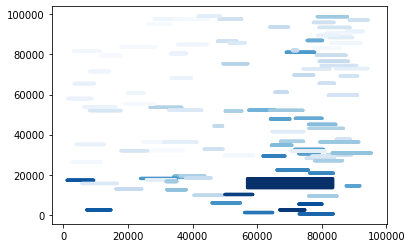

In [ ]:
for well in best_wells:
    x.extend(well.getX())
    y.extend(well.getY())
    prod.extend([168000]*100)
plt.scatter(x, y, c=prod, cmap='Blues', s=5)
plt.show()

# Original Oil in Place and Recoverable Reserves Calculations

**Volume Calculation**: The density of quartz ($2.65 \frac{g}{cm^3}$) is converted to cubic feet in the calculation. Furthermore, the proppant weight is converted from pounds to grams.

In [ ]:
# Returns the volume in cubic feet
def get_volume(prop_weight, por):
    return (prop_weight * 453.592 * (1 - por) / 2.65) * (3.53 * math.exp(-5))

In [ ]:
# Returns the area in square feet
def get_area(volume, thickness, well_length):
    return volume * well_length / (thickness * 0.4)

Let's also get the min and max areas

For the below calculations, we will use the ``area``, ``thickness``, ``porosity``, and ``water saturation`` from *King 13-28H*, a nearby well which happens to be quite good.

In [ ]:
area_file = pd.read_csv(os.path.join('well production', 'King 13-28H.csv'))
area_file = area_file.dropna()
sand_vol  = np.mean(get_volume(area_file['proppant weight (lbs)'], area_file['porosity']))
area_min = get_area(sand_vol, 21, 26400)
area_max = get_area(sand_vol, 79, 26400)
porosity_mean = area_file['porosity']
water_saturation_mean = area_file['water saturation'].mean()

**Original Oil in Place Calculation**: $OOIP = \frac{7758AH\phi(1-S_{w})}{FVF}$

In [ ]:
def getOOIP(area, thickness, porosity, water_saturation, FVF):
    return 7758 * area * thickness * (1 - water_saturation) / FVF;

In [ ]:
OOIP = getOOIP(area_min, 21, porosity_mean, water_saturation_mean, 1.6)
print("OOIP: " + str(OOIP))

OOIP: 772378035974445.6


**Recoverable Reserves Calculation**:
$RR = OOIP * RF$

In [ ]:
recovery_factor_min = 0.01
recovery_factor_max = 0.1

recoverable_reserves_min = recovery_factor_min * OOIP
recoverable_reserves_max = recovery_factor_max * OOIP

print("Minimum Recoverable Reserves: " + str(recoverable_reserves_min))
print("Maximum Recoverable Reserves: " + str(recoverable_reserves_max))

Minimum Recoverable Reserves: 7723780359744.456
Maximum Recoverable Reserves: 77237803597444.56


Now, since we assume each of our 10 wells produces the same amount of oil, our total OOIP and RR will simply be 10 times that of the model well, *King 13-28H*.

In [ ]:
print("TOTAL OOIP          : " + "{:e}".format(10*OOIP))
print("TOTAL EUR/RR RANGE  : " + "{:e}".format(10*recoverable_reserves_min) + str(" to ") + "{:e}".format(10*recoverable_reserves_max))

TOTAL OOIP          : 7.723780e+15
TOTAL EUR/RR RANGE  : 7.723780e+13 to 7.723780e+14
